In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.api import add_constant, Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, classification_report

# Increase the print output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# # Set plot size
# plt.rcParams['figure.figsize'] = [25,40] # Width, Height

In [2]:
# Set working directory
os.chdir("Logistic_Regression")

# Read in the data
fullRaw = pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
fullRaw.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### PROBLEM STATEMENT

The data set is the response of people to the h1n1 flu vaccine related questionnaire. The respondents are people of age 6 months and older. This survey was designed to monitor the influenza immunization coverage in 2009-10 season. Machine learning techniques may aid a more efficient analysis in the prediction of how likely the people are to opt for the flu vaccine. In this case study, we predict, how likely it is that the people will take a H1N1 flu vaccine.


### DATA DEFINITION

**unique_id**: Unique identifier for each respondent - (Numerical)    

**h1n1_worry**: Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried - (Categorical)

**h1n1_awareness**: Signifies the amount of knowledge or understanding the respondent has about h1n1 flu - (0,1,2) - 0=No knowledge, 1=little knowledge, 2=good knowledge- (Categorical) 
 
**antiviral_medication**: Has the respondent taken antiviral vaccination - (0,1) (Categorical)
    
**contact_avoidance**: Has avoided any close contact with people who have flu-like symptoms  - (0,1) - (Categorical)
    
**bought_face_mask**: Has the respondent bought mask or not - (0,1) - (Categorical)
    
**wash_hands_frequently**: Washes hands frequently or uses hand sanitizer - (0,1) - (Categorical)
    
**avoid_large_gatherings**: Has the respondent reduced time spent at large gatherings - (0,1) - (Categorical)
    
**reduced_outside_home_cont**: Has the respondent reduced contact with people outside own house - (0,1) - (Categorical)
    
**avoid_touch_face**: Avoids touching nose, eyes, mouth - (0,1) - (Categorical)

**dr_recc_h1n1_vacc**: Doctor has recommended h1n1 vaccine - (0,1) - (Categorical)
    
**dr_recc_seasonal_vacc**: Doctor has recommended seasonalflu vaccine - (0,1) - (Categorical)
    
**chronic_medic_condition**: Has any chronic medical condition - (0,1) - (Categorical)
    
**cont_child_undr_6_mnth** - Has a regular contact with child the age of 6 months - (0,1) - (Categorical)

**is_health_worker**: Is respondent a health worker - (0,1) - (Categorical)
    
**has_health_insur**: Does respondent have health insurance - (0,1) - (Categorical)
    
**is_h1n1_vacc_effective**:  Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective) - (Categorical)

**is_h1n1_risky**: What respondenst think about the risk of getting ill with h1n1 in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky) - (Categorical)
 
**sick_from_h1n1_vacc**: Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried) - (Categorical)

**is_seas_vacc_effective**: Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective) - (Categorical)

**is_seas_flu_risky**: What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky) - (Categorical)
 
**sick_from_seas_vacc**: Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried) - (Categorical)

**age_bracket** - Age bracket of the respondent - (18 - 34 Years, 35 - 44 Years, 45 - 54 Years, 55 - 64 Years, 64+ Years) - (Categorical)
    
**qualification** - Qualification/education level of the respondent as per their response -(<12 Years, 12 Years, College Graduate, Some College) - (Categorical)
    
**race**: Respondent's race - (White, Black, Other or Multiple ,Hispanic) - (Categorical) 
    
**sex**: Respondent's sex - (Female, Male) - (Categorical)
    
**income_level**:Annual income of the respondent as per the 2008 poverty Census - (<=$75000-Above Poverty, >$75000, Below Poverty) - (Categorical)
    
**marital_status**: Respondent's marital status - (Not Married, Married) - (Categorical)
    
**housing_status**: Respondent's housing status - (Own, Rent) - (Categorical)
    
**employment**: Respondent's employment status - (Not in Labor Force, Employed, Unemployed) - (Categorical)
    
**census_msa**: Residence of the respondent with the MSA(metropolitan statistical area)(Non-MSA, MSA-Not Principle, CityMSA-Principle city) - (Yes, no) - (Categorical)
    
**no_of_adults**:  Number of adults in the respondent's house (0,1,2,3) - (Yes, no) - (Categorical)

**no_of_children**: Number of children in the respondent's house(0,1,2,3) - (Yes, No) - (Categorical)

**h1n1_vaccine**: (Dependent variable)Did the respondent received the h1n1 vaccine or not(1,0) - (Yes, No) - (Categorical)

### BASIC DATA CHECKS/ QUALITY CHECKS

In [4]:
# Check the total rows
print(fullRaw.shape)

# Check the data types for variables
fullRaw.dtypes

(26707, 34)


unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

**Float to Categorical:** Variables like 'h1n1_worry', 'h1n1_awareness' etc are identified as float. But as per data attribute information we have, 'these variables are categorical, which are wrongly interpreted as float, so we convert these variables' data type to 'object'.

**unique_id** is a unique id of each of the survey respondents. We will drop this field as it will not be used in the analysis.

In [5]:
# Lets change the data based on above inferences

# Lets drop unique_id first
fullRaw.drop("unique_id", axis = 1, inplace = True)


In [6]:
# Float to Categorical: If you see, all columns except "h1n1_vaccine" needs to be categorical

allColumns = fullRaw.columns
print(allColumns)
fullRaw[allColumns[allColumns != "h1n1_vaccine"]] = fullRaw[allColumns[allColumns != "h1n1_vaccine"]].astype("object")
fullRaw.dtypes

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'], dtype='object')


h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status               object
housing_status              

### RANDOM SAMPLING

In [7]:
# Randomly Sample Raw Data into Training and Testing. train_test_split() is used for random sampling

trainRaw, testRaw = train_test_split(fullRaw, train_size=0.75, random_state = 150)
# random_state ensures reproducibility of same random results. Any number of your choice would work, I have taken 150.

print(trainRaw.shape)
print(testRaw.shape)

(20030, 33)
(6677, 33)


In [8]:
# Create Source Column in all the datasets. It helps in keeping track of which rows belong to which source of data.

trainRaw = trainRaw.copy()
testRaw = testRaw.copy()

trainRaw["Source"] = "Train"
testRaw["Source"] = "Test"

In [9]:
trainRaw.head()
# testRaw.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,Source
19370,1,2,0,0,0,0,0,0,0,NaN,NaN,0,1,0,NaN,2,2,4,2,1,1,35 - 44 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Not Principle City",1,3,0,Train
1768,2,1,0,1,0,1,0,0,0,1,1,1,0,0,1,5,4,2,4,4,4,18 - 34 Years,Some College,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0,0,1,Train
4539,3,1,0,1,0,1,1,1,1,0,0,0,0,0,NaN,3,3,2,3,4,2,55 - 64 Years,< 12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1,0,0,Train
25631,2,2,0,1,0,1,0,0,1,0,1,0,0,0,1,5,2,2,5,4,1,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1,0,0,Train
21747,2,2,0,1,0,1,0,0,1,0,0,1,0,0,1,4,2,2,4,2,2,18 - 34 Years,Some College,White,Male,NaN,Not Married,Own,Employed,"MSA, Not Principle City",1,0,0,Train


In [10]:
# Combine Train, Test, Prediction
fullRaw = pd.concat([trainRaw, testRaw], axis = 0)
fullRaw.shape

(26707, 34)

In [11]:
fullRaw.head()
# fullRaw.tail()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,Source
19370,1,2,0,0,0,0,0,0,0,NaN,NaN,0,1,0,NaN,2,2,4,2,1,1,35 - 44 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Not Principle City",1,3,0,Train
1768,2,1,0,1,0,1,0,0,0,1,1,1,0,0,1,5,4,2,4,4,4,18 - 34 Years,Some College,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0,0,1,Train
4539,3,1,0,1,0,1,1,1,1,0,0,0,0,0,NaN,3,3,2,3,4,2,55 - 64 Years,< 12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1,0,0,Train
25631,2,2,0,1,0,1,0,0,1,0,1,0,0,0,1,5,2,2,5,4,1,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1,0,0,Train
21747,2,2,0,1,0,1,0,0,1,0,0,1,0,0,1,4,2,2,4,2,2,18 - 34 Years,Some College,White,Male,NaN,Not Married,Own,Employed,"MSA, Not Principle City",1,0,0,Train


### EDA

#### Data Summarization

In [12]:
# Summarize the data (continuous variables): The only continuous variable is our dependent (which technically is categorical)

# Check the count
print(trainRaw["h1n1_vaccine"].value_counts())

# Convert the count to percentage
round(trainRaw["h1n1_vaccine"].value_counts()/ trainRaw.shape[0], 2)*100

# About 1/5 of the training data has got the vaccination

0    15789
1     4241
Name: h1n1_vaccine, dtype: int64


0    79.0
1    21.0
Name: h1n1_vaccine, dtype: float64

In [13]:
# Summarize the data (categorical variables)
trainRaw.describe(include = "object").transpose() # transposing it to get a better view of the output if you have many variables

,count,unique,top,freq
h1n1_worry,19964,4,2,7902
h1n1_awareness,19949,3,1,10978
antiviral_medication,19976,2,0,19009
contact_avoidance,19869,2,1,14419
bought_face_mask,20015,2,0,18634
wash_hands_frequently,19996,2,1,16573
avoid_large_gatherings,19968,2,0,12748
reduced_outside_home_cont,19972,2,0,13199
avoid_touch_face,19937,2,1,13497
dr_recc_h1n1_vacc,18428,2,0,14363


One quick inference we can draw on the categorical variables is that there are no variables which happen to have a large number of categories, which means we do not need to perform any "combining of categories", as we had to do in the earlier case study



#### Data Distribution: Categorical Variables (Univariate Analysis)

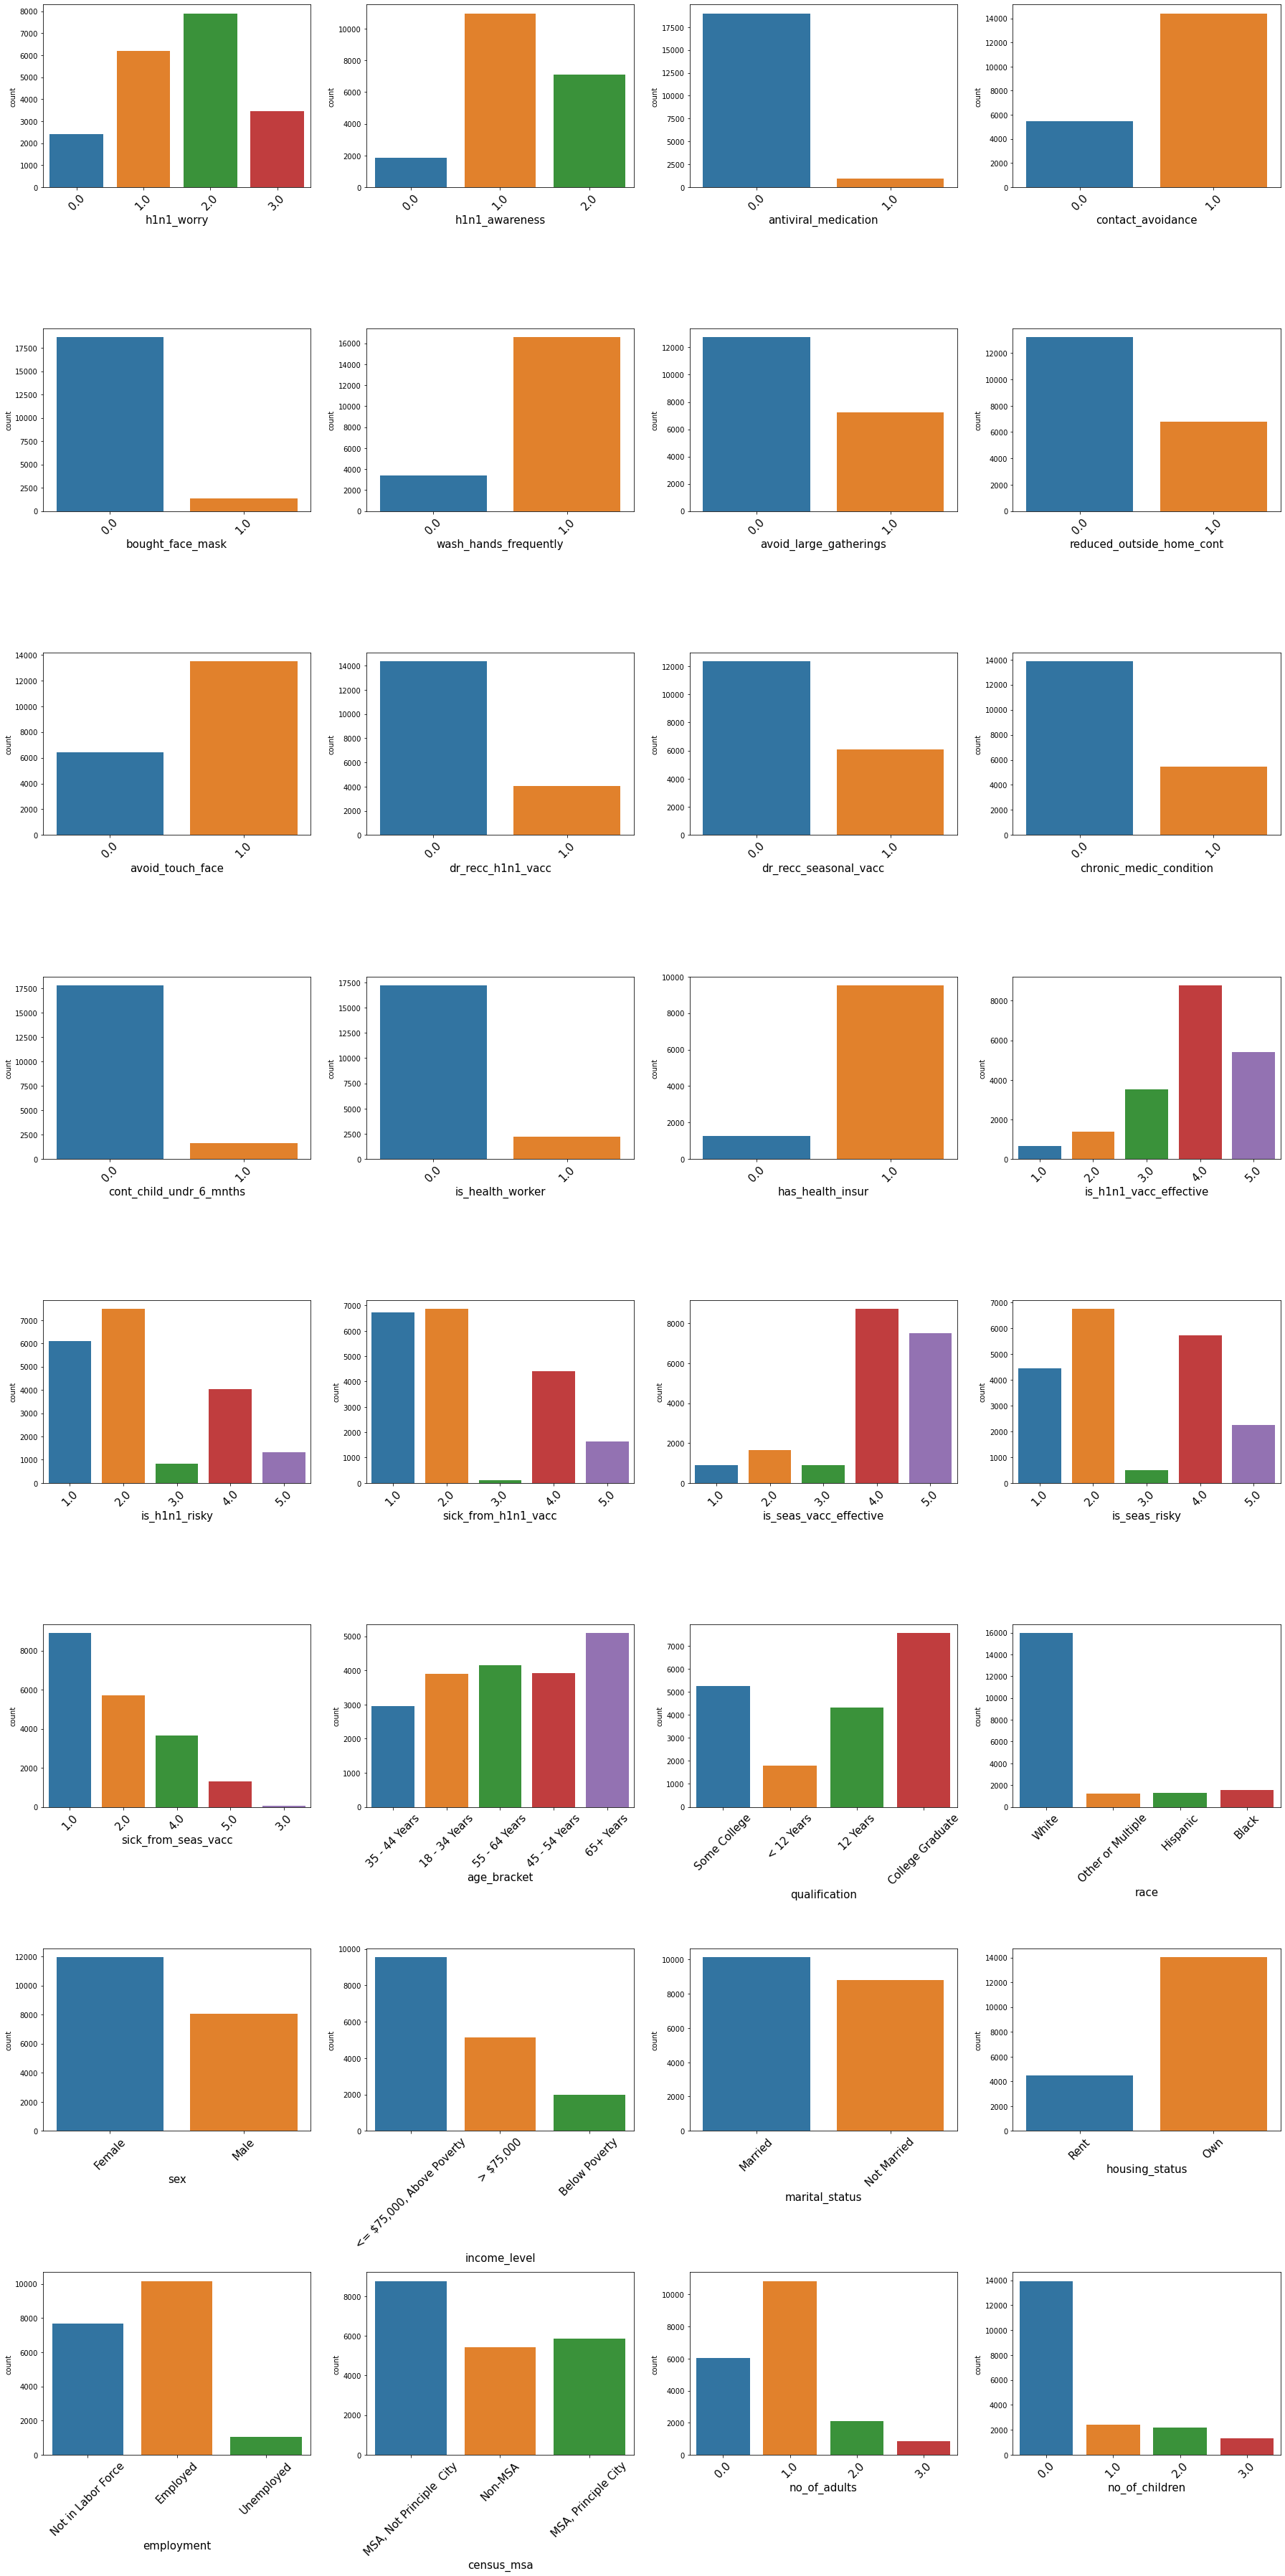

In [14]:
categoricalVars = trainRaw.columns[trainRaw.dtypes == object]
fig, ax = plt.subplots(8, 4, figsize = [25,50]) # Rows, Columns | figsize: Width, Height

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array of 8*4 elements (32 plots in all)
    
    plot  = sns.countplot(x = trainRaw[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize = 15)
    plot.set_xlabel(variable, fontsize = 15) # Increase the fontsize of variable names in each plot

plt.tight_layout();

Most of the people happen to be above 65 years of age bracket.

There are very few non-white people (race), who are part of this sample.

employment    Employed  Not in Labor Force  Unemployed
h1n1_vaccine                                          
0                 7991                6016         880
1                 2183                1676         182


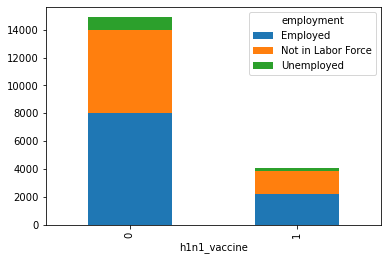

In [15]:
# Prepare data containing cross tabulated "count" of two variables
df1 = pd.crosstab(index = trainRaw["h1n1_vaccine"], columns = trainRaw["employment"])
print(df1)

# Stacked bar plot
df1.plot(kind='bar', stacked=True);

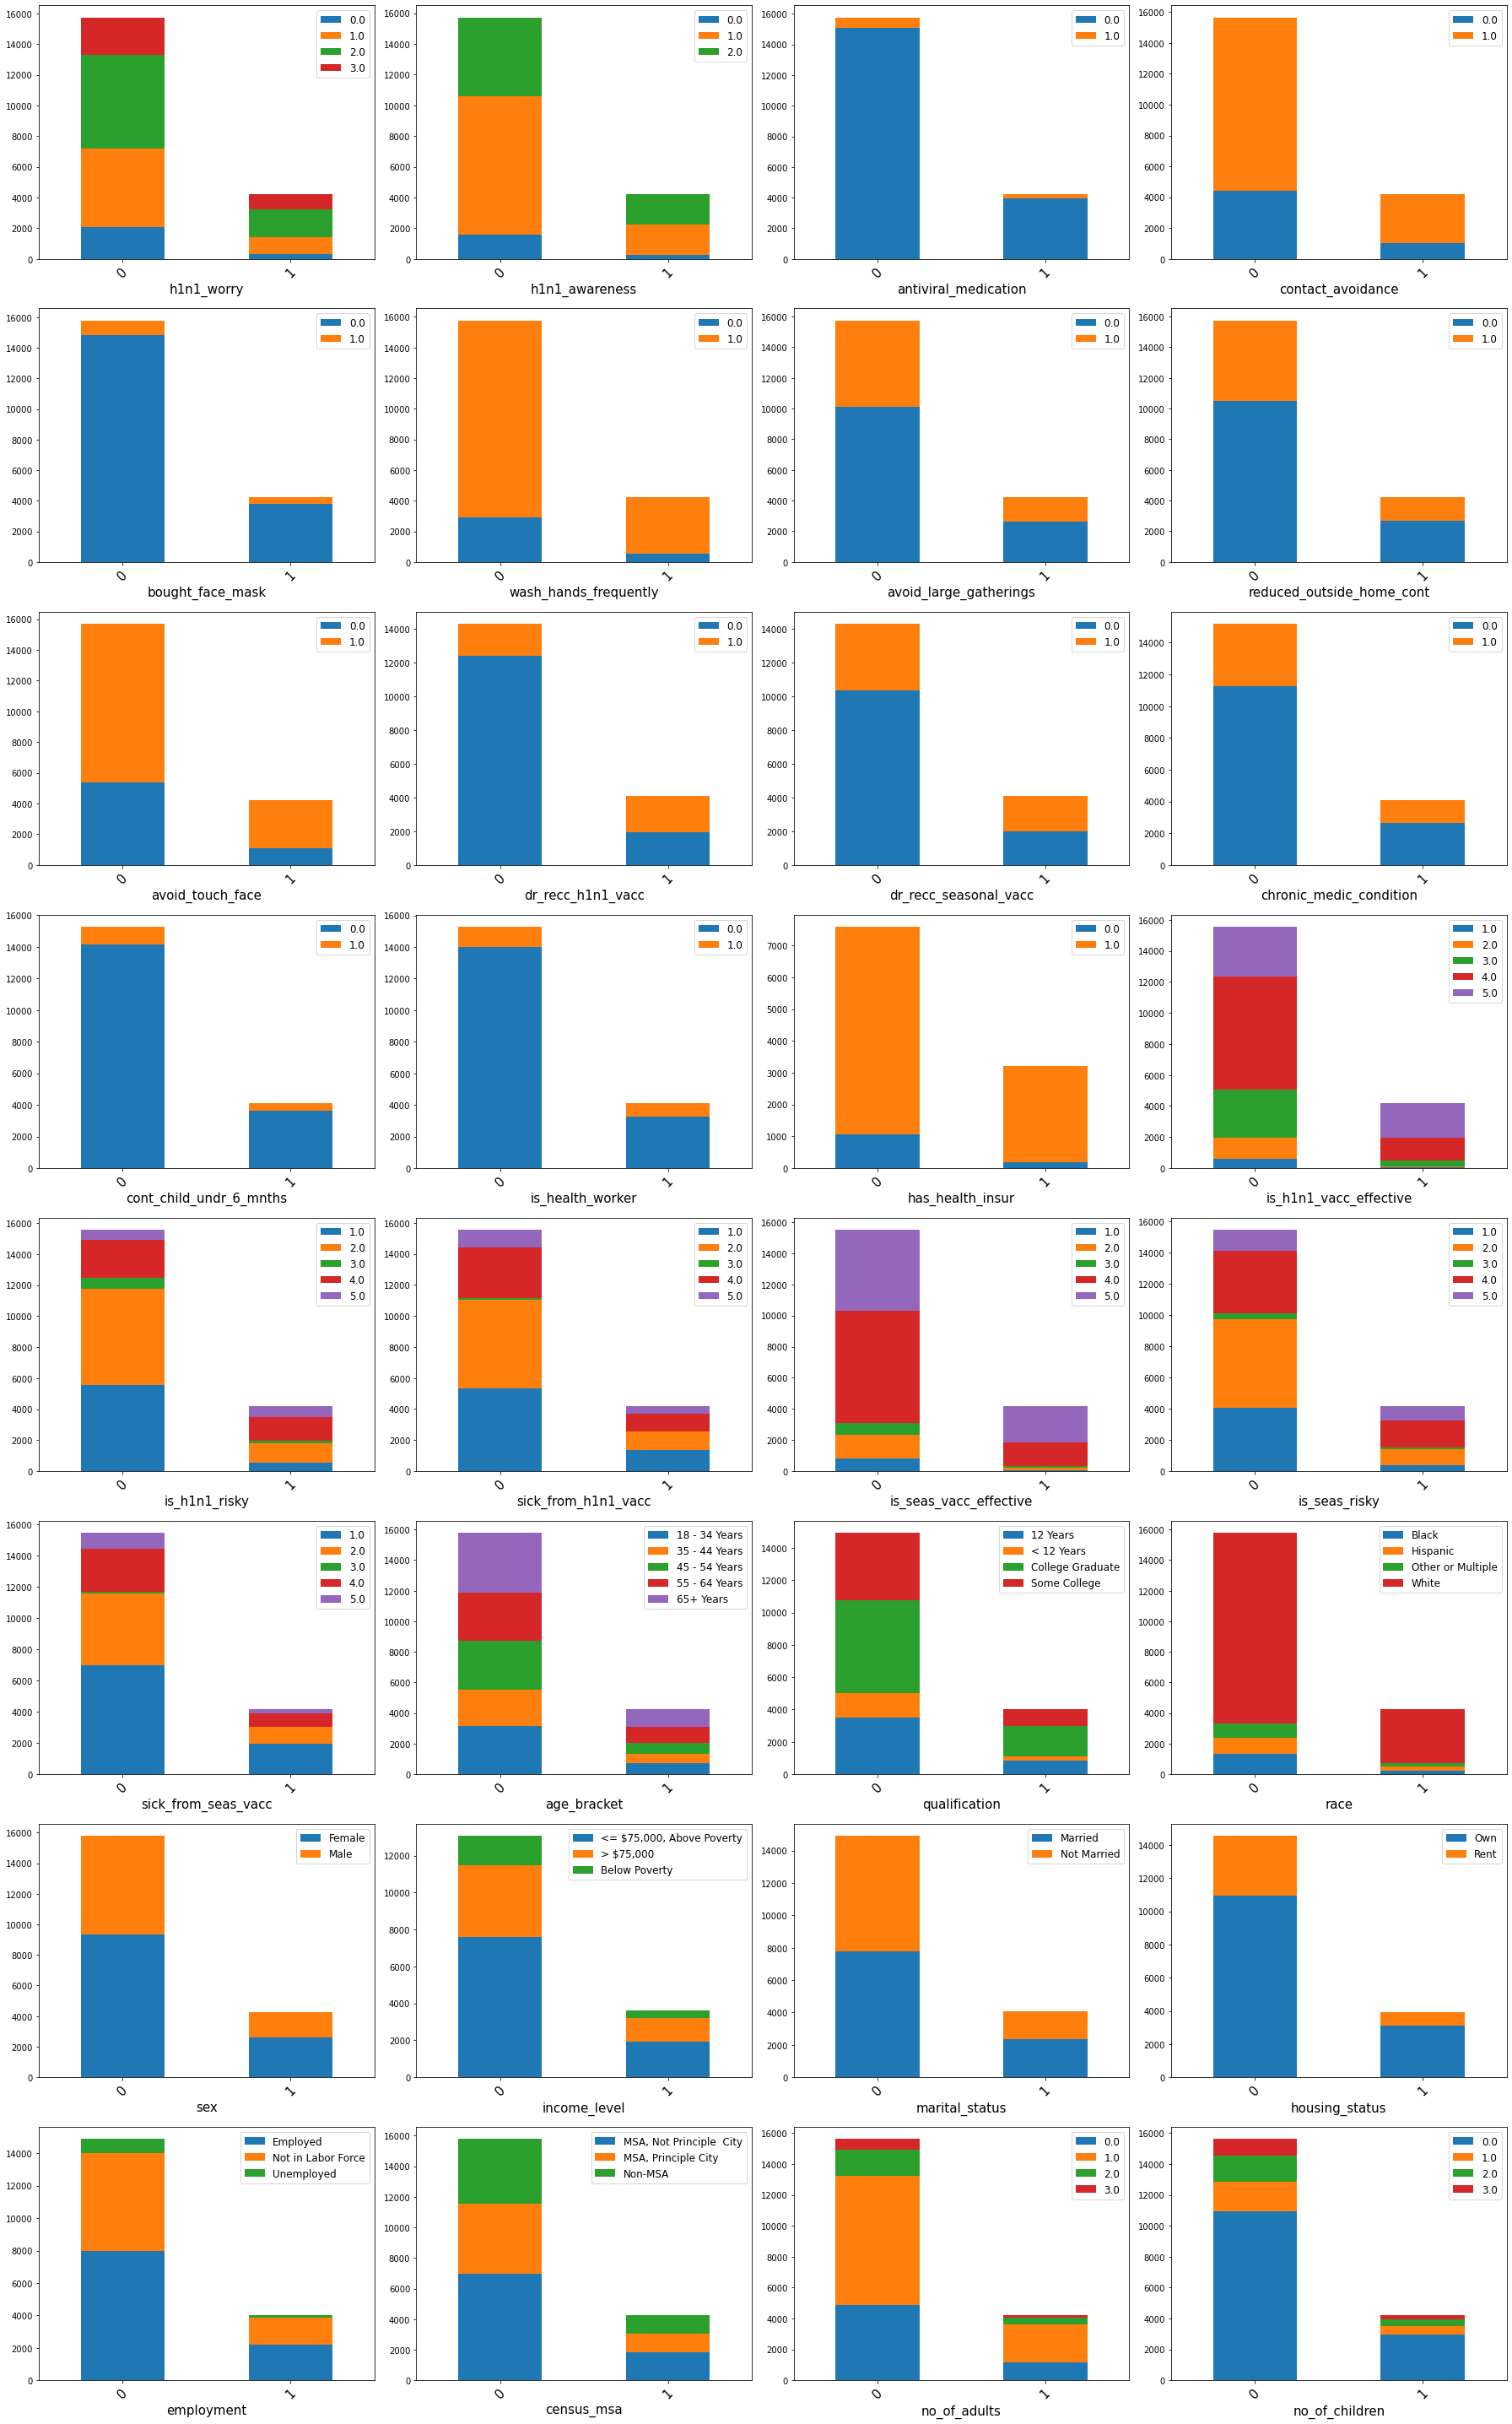

In [16]:
# Lets put the above logic in the same for loop as above

fig, ax = plt.subplots(8, 4, figsize = [25,40]) # Rows, Columns | figsize: Width, Height

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array of 2*4 elements (8 plots in all)
    
    df1 = pd.crosstab(index = trainRaw["h1n1_vaccine"], columns = trainRaw[variable])
    plot = df1.plot(kind='bar', stacked=True, ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize = 15)
    plot.set_xlabel(variable, fontsize = 15) # Increase the fontsize of variable names in each plot
    plot.legend(prop={'size': 12}) # prop is property dictionary

plt.tight_layout();

In [17]:

# We can get total of rows by using the "margins" argument in "crosstab()"
df1 = pd.crosstab(index = trainRaw["h1n1_vaccine"], columns = trainRaw["no_of_children"], margins = 1) # Example
df1

# Drop the row containg index "ALL" as its not useful for us
df1.drop(index = "All", axis = 0, inplace = True)
df1

# Lets convert individual category numbers to percentages by dividing the numbers by the "All" column
df1 = df1.div(df1["All"], axis = 0) # axis = 0 indicates row wise division (each row is divided by its total)
df1

# Remove the "All" column as its not needed anymore
df1.drop("All", axis = 1, inplace = True)
df1

no_of_children,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,0.700999,0.121047,0.109141,0.068813
1,0.709371,0.118624,0.108185,0.063820


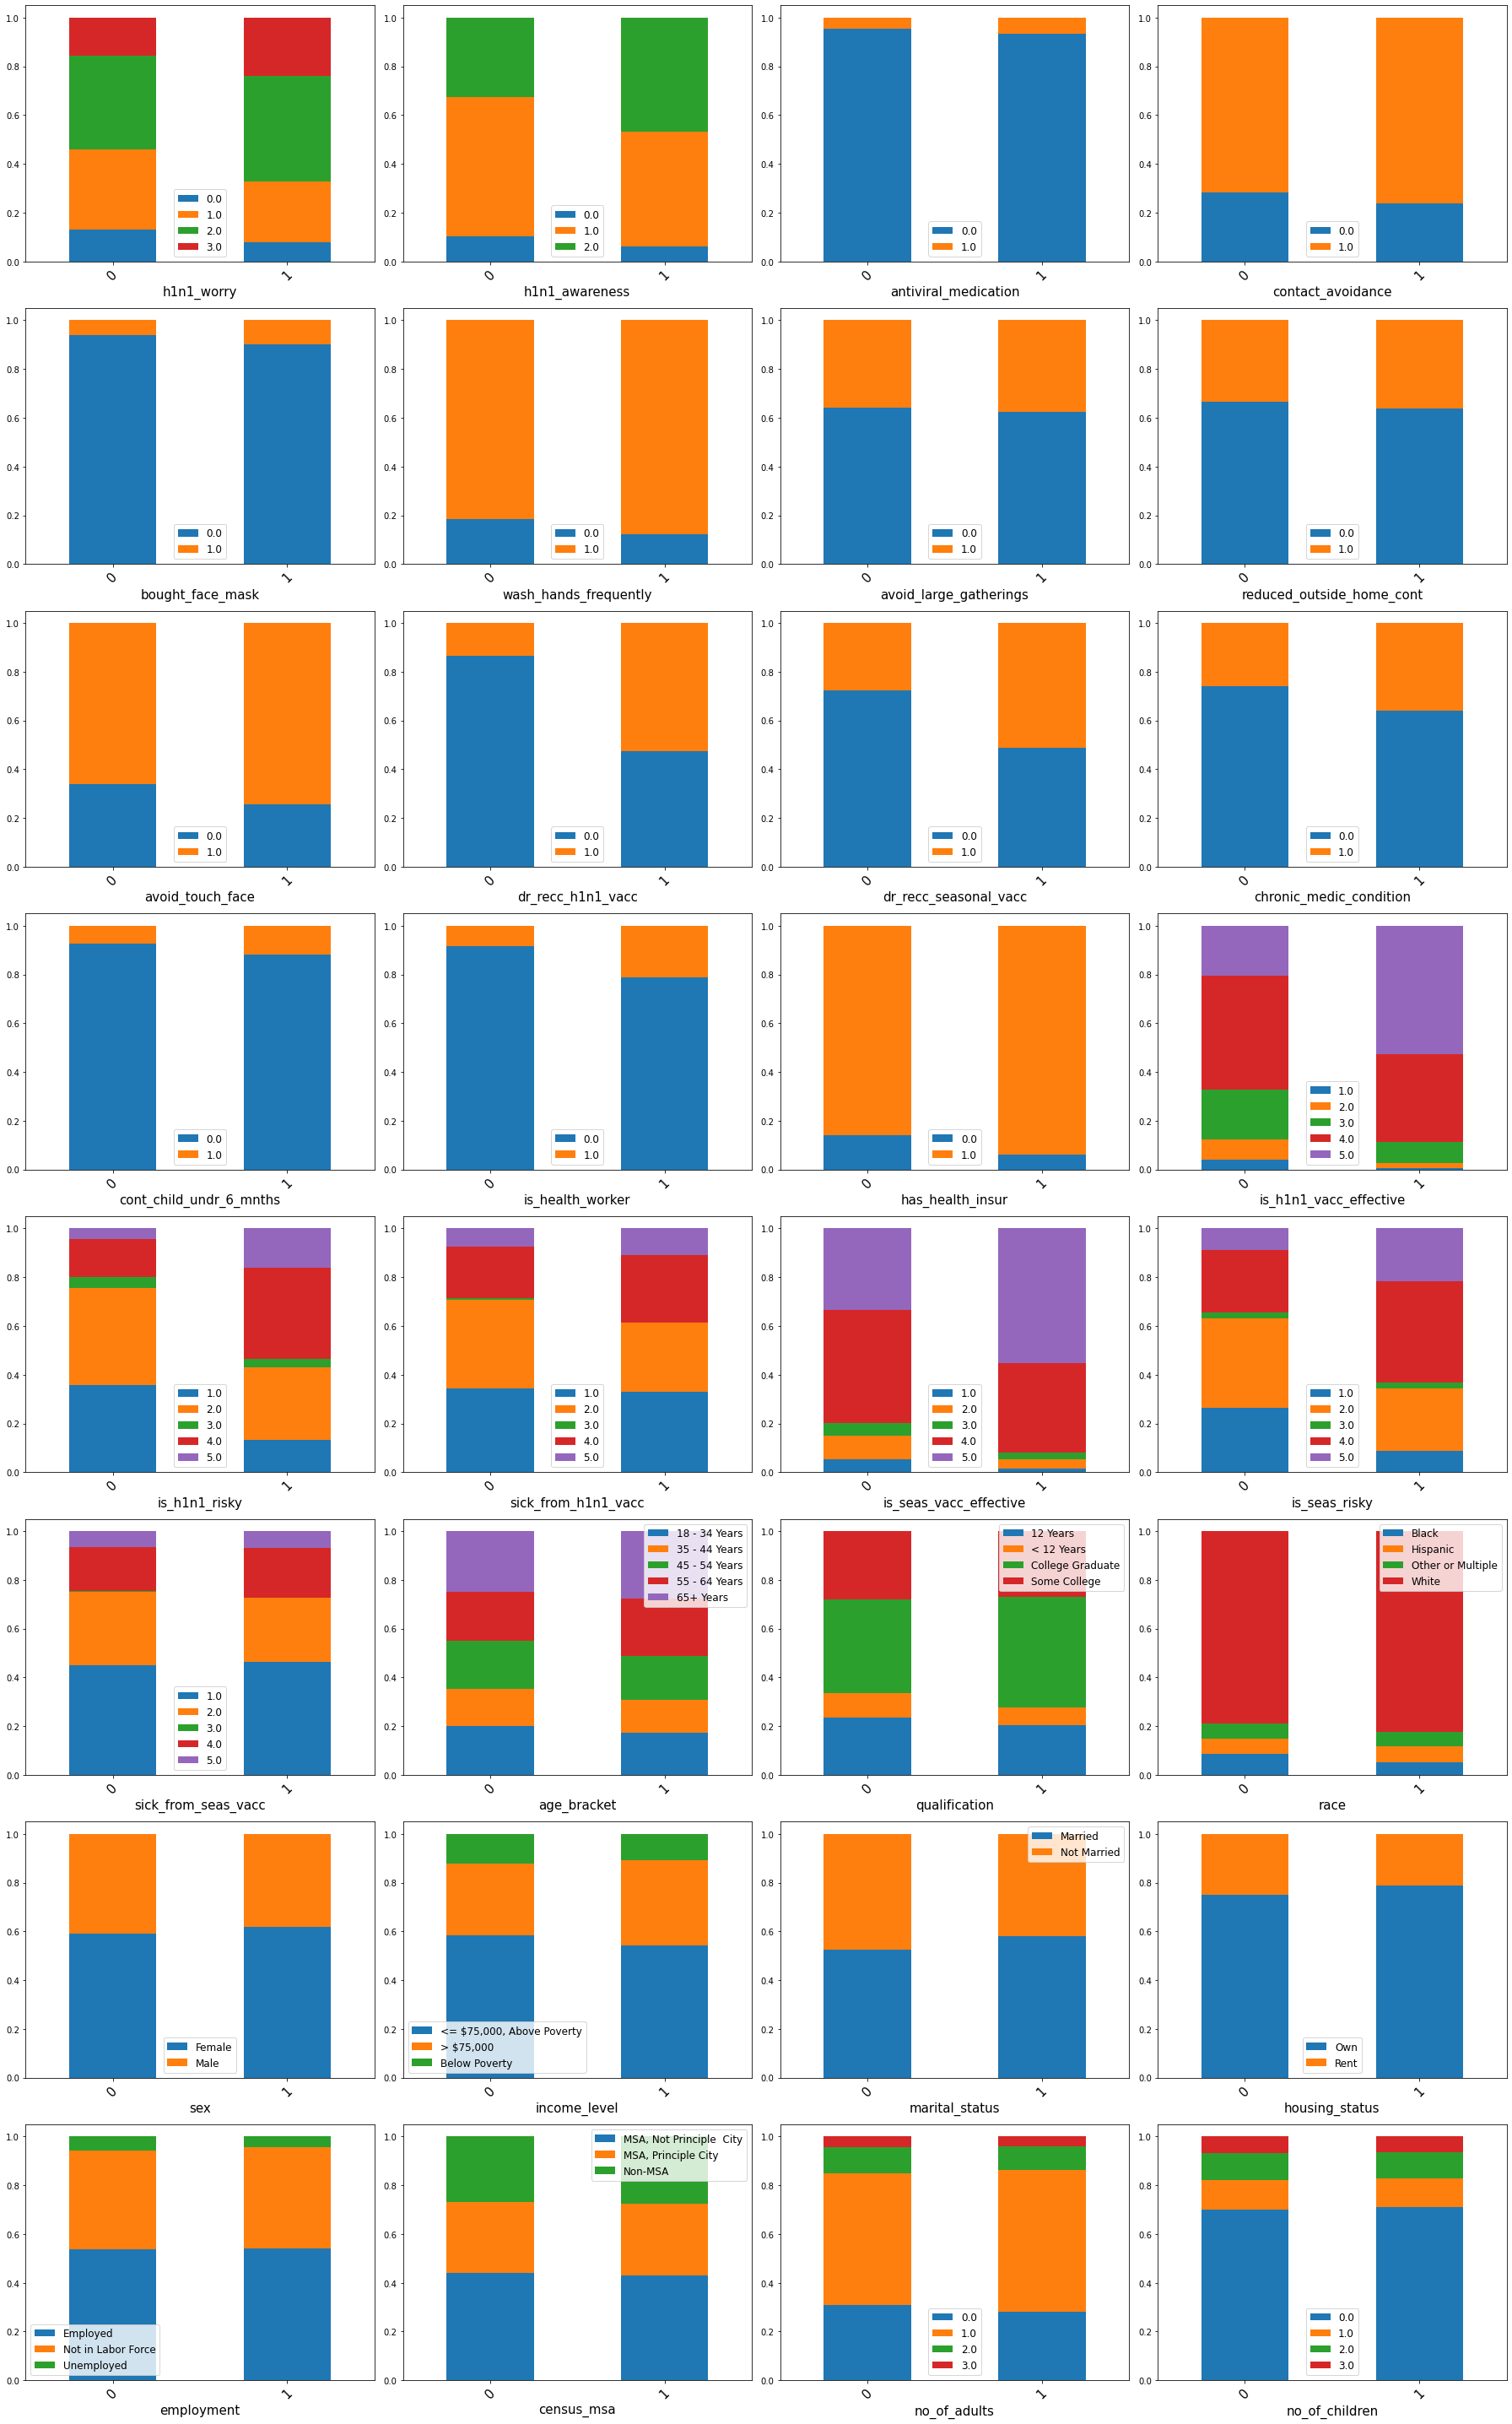

In [18]:
# Lets include the above logic in our plotting

fig, ax = plt.subplots(8, 4, figsize = [25,40]) # Rows, Columns | figsize: Width, Height

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array of 2*4 elements (8 plots in all)
    
    df1 = pd.crosstab(index = trainRaw["h1n1_vaccine"], columns = trainRaw[variable], margins = 1)
    df1.drop(index = "All", axis = 0, inplace = True)
    df1 = df1.div(df1["All"], axis = 0)
    df1.drop("All", axis = 1, inplace = True)
    
    plot = df1.plot(kind='bar', stacked=True, ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize = 15)
    plot.set_xlabel(variable, fontsize = 15) # Increase the fontsize of variable names in each plot
    plot.legend(prop={'size': 12}) # prop is property dictionary

plt.tight_layout();

### DATA PREPARATION

#### Missing Value Correction (NOT Imputation)

In [19]:
# Percentage NA values per column
round(100*trainRaw.isna().sum()/trainRaw.shape[0],2)

h1n1_worry                    0.33
h1n1_awareness                0.40
antiviral_medication          0.27
contact_avoidance             0.80
bought_face_mask              0.07
wash_hands_frequently         0.17
avoid_large_gatherings        0.31
reduced_outside_home_cont     0.29
avoid_touch_face              0.46
dr_recc_h1n1_vacc             8.00
dr_recc_seasonal_vacc         8.00
chronic_medic_condition       3.59
cont_child_undr_6_mnths       3.08
is_health_worker              3.03
has_health_insur             46.09
is_h1n1_vacc_effective        1.41
is_h1n1_risky                 1.42
sick_from_h1n1_vacc           1.47
is_seas_vacc_effective        1.70
is_seas_risky                 1.88
sick_from_seas_vacc           1.99
age_bracket                   0.00
qualification                 5.26
race                          0.00
sex                           0.00
income_level                 16.72
marital_status                5.32
housing_status                7.60
employment          

In [20]:
# For this exercise I'll do the following:
# 1. Drop COLUMNS has_health_insur, income_level from fullRaw
# 2. Then drop all ROWS which are missing from fullRaw

# If we drop the NA Rows first, then we would LOSE MORE data (rows). Why/ How?

In [21]:
# 1. Drop COLUMNS has_health_insur, income_level from fullRaw
fullRaw.drop(columns = ["has_health_insur", "income_level"], axis = 1, inplace = True)
fullRaw.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine', 'Source'], dtype='object')

In [22]:
fullRaw.shape

(26707, 32)

In [23]:
# 2. Then drop all ROWS which are NAs from fullRaw
fullRaw.dropna(inplace = True)
print(fullRaw.shape) # Should have lesser rows than before
round(100*fullRaw.isna().sum()/fullRaw.shape[0],2) # Should have 0 NAs in all columns

(21710, 32)


h1n1_worry                   0.0
h1n1_awareness               0.0
antiviral_medication         0.0
contact_avoidance            0.0
bought_face_mask             0.0
wash_hands_frequently        0.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             0.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
is_h1n1_vacc_effective       0.0
is_h1n1_risky                0.0
sick_from_h1n1_vacc          0.0
is_seas_vacc_effective       0.0
is_seas_risky                0.0
sick_from_seas_vacc          0.0
age_bracket                  0.0
qualification                0.0
race                         0.0
sex                          0.0
marital_status               0.0
housing_status               0.0
employment                   0.0
census_msa                   0.0
no_of_adults                 0.0
no_of_children               0.0
h1n1_vacci

In [25]:
# Lets create dummy variables out of the categorical variables

fullRaw2 = pd.get_dummies(fullRaw, drop_first = True).copy() # 'Source'  column will change to 'Source_Train'
print(fullRaw2.shape)
fullRaw2.head()

(21710, 66)


,h1n1_vaccine,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,dr_recc_h1n1_vacc_1.0,dr_recc_seasonal_vacc_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,Source_Train
1768,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4539,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
25631,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
21747,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
20946,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


### SAMPLING

#### Divide the full dataset into train and test

In [26]:
# Step 1: Divide the full data

Train = fullRaw2[fullRaw2['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
Test = fullRaw2[fullRaw2['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

print(Train.shape)
print(Test.shape)


(16330, 65)
(5380, 65)


In [27]:
# Step 2: Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

trainX = Train.drop(['h1n1_vaccine'], axis = 1).copy()
trainY = Train['h1n1_vaccine'].copy()
testX = Test.drop(['h1n1_vaccine'], axis = 1).copy()
testY = Test['h1n1_vaccine'].copy()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(16330, 64)
(16330,)
(5380, 64)
(5380,)


### MODEL BUILDING (Part 1: MLE Using Statsmodels Library)

#### Add Intercept Column

In [28]:
# In Statsmodels, logistic regression function does NOT account for an intercept by default.
# So, we need to explicitely add intercept (in the df) - a column called "const" with all values being 1 in it.

trainX = add_constant(trainX)
testX = add_constant(testX)

print(trainX.shape)
print(testX.shape)

(16330, 65)
(5380, 65)


In [29]:
trainX.head() # A new column called "const" (stands for contant or intercept) gets added
# testX.head() # A new column called "const" (stands for contant or intercept) gets added

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,dr_recc_h1n1_vacc_1.0,dr_recc_seasonal_vacc_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
1768,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4539,1.0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
25631,1.0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
21747,1.0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
20946,1.0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


#### Variance Inflation Factor (VIF) Check for Multicollinearity

VIF is usually a little relaxed compared to linear regression (as the impact of multicollinearity reduces due to the non-linearity the logistic/sigmoid function brings). So, VIF threshold is usually kept at 10 

In [30]:
tempMaxVIF = 10
maxVIF = 10
trainXCopy = trainX.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        print(counter)
        print(tempColumnName)
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1


1
const


In [31]:
# print(highVIFColumnNames)
# There are no variables to remove as only "Const" is getting dropped - which we anyway cannot remove. So no action needed.

#### Model Building

In [32]:
m1Model = Logit(trainY, trainX).fit() # Dep, Indep
m1Model.summary() # This is model output summary



Optimization terminated successfully.
         Current function value: 0.384508
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                16330
Model:                          Logit   Df Residuals:                    16265
Method:                           MLE   Df Model:                           64
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.2794
Time:                        08:18:42   Log-Likelihood:                -6279.0
converged:                       True   LL-Null:                       -8713.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.8527      0.314    -15.440      0.000      -5.469      -4.237
h1n1_worry_1.0                    -0.1309      0.092     -1.419      0.156      -0.312       0.050
h1n1_worry_2.0                    -0.1718      0.094     -1.825      0.068      -0.356       0.013
h1n1_worry_3.0                    -0.3122      0.107     -2.922      0.003      -0.522      -0.103
h1n1_awareness_1.0                 0.0988      0.103      0.957      0.338      -0.104       0.301
h1n1_awareness_2.0                 0.2715      0.108      2.511      0.012       0.060       0.483
antiviral_medication_1.0           0.1561      0.103      1.512      0.130      -0.046       0.358
contact_avoidance_1.0             -0.0991      0.059     -1.693      0.090      -0.214       0.016
bought_face_mask_1.0               0.0821      0.087      0.939      0.348      -0.089       0.254
wash_hands_frequently_1.0         -0.0294      0.074     -0.398      0.691      -0.174       0.115
avoid_large_gatherings_1.0        -0.1542      0.060     -2.573      0.010      -0.272      -0.037
reduced_outside_home_cont_1.0     -0.0594      0.061     -0.973      0.331      -0.179       0.060
avoid_touch_face_1.0               0.0546      0.056      0.968      0.333      -0.056       0.165
dr_recc_h1n1_vacc_1.0              2.0367      0.066     30.713      0.000       1.907       2.167
dr_recc_seasonal_vacc_1.0         -0.6086      0.066     -9.269      0.000      -0.737      -0.480
chronic_medic_condition_1.0        0.1162      0.052      2.253      0.024       0.015       0.217
cont_child_undr_6_mnths_1.0        0.3190      0.078      4.107      0.000       0.167       0.471
is_health_worker_1.0               0.8881      0.067     13.331      0.000       0.758       1.019
is_h1n1_vacc_effective_2.0         0.0657      0.277      0.237      0.812      -0.477       0.608
is_h1n1_vacc_effective_3.0         0.5023      0.255      1.972      0.049       0.003       1.001
is_h1n1_vacc_effective_4.0         0.9611      0.247      3.887      0.000       0.476       1.446
is_h1n1_vacc_effective_5.0         1.8384      0.248      7.410      0.000       1.352       2.325
is_h1n1_risky_2.0                  0.4370      0.071      6.141      0.000       0.298       0.576
is_h1n1_risky_3.0                  0.6555      0.154      4.250      0.000       0.353       0.958
is_h1n1_risky_4.0                  1.1643      0.080     14.560      0.000       1.008       1.321
is_h1n1_risky_5.0                  1.4742      0.107     13.837      0.000       1.265       1.683
sick_from_h1n1_vacc_2.0           -0.2919      0.063     -4.618      0.000      -0.416      -0.168
sick_from_h1n1_vacc_3.0           -0.4796      0.482     -0.996      0.319      -1.424       0.464
sick_from_h1n1_vacc_4.0           -0.1028      0.070     -1.459      0.145      -0.241       0.035
sick_from_h1n1_vacc_5.0           -0.0031      0.104     -0.029      0.97

#### Model Optimization

In [33]:
# We will use a for loop and discard indep variables based on "p-value"
# The concept of the for loop will remain very similar to VIF loop.

tempMaxPValue = 0.1
maxPValue = 0.1
trainXCopy = trainX.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValue):
    
    tempModelDf = pd.DataFrame()    
    Model = Logit(trainY, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"])[-1:]["Column_Name"].values[0]
    tempMaxPValue = tempModelDf.sort_values(["PValue"])[-1:]["PValue"].values[0]
    
    if (tempMaxPValue >= maxPValue): # This condition will ensure that ONLY columns having p-value lower than 0.1 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

print(highPValueColumnNames)

Optimization terminated successfully.
         Current function value: 0.384508
         Iterations 7
sick_from_h1n1_vacc_5.0 0.9765703073728189
Optimization terminated successfully.
         Current function value: 0.384508
         Iterations 7
is_seas_vacc_effective_2.0 0.9049564212235421
Optimization terminated successfully.
         Current function value: 0.384508
         Iterations 7
employment_Unemployed 0.8615584067890587
Optimization terminated successfully.
         Current function value: 0.384509
         Iterations 7
is_h1n1_vacc_effective_2.0 0.8271928186962569
Optimization terminated successfully.
         Current function value: 0.384511
         Iterations 7
age_bracket_35 - 44 Years 0.7807565926661029
Optimization terminated successfully.
         Current function value: 0.384513
         Iterations 7
wash_hands_frequently_1.0 0.687910846598121
Optimization terminated successfully.
         Current function value: 0.384518
         Iterations 7
no_of_children_3.0 0.

In [34]:
# Lets drop all the insignificant columns (based on pvalues) from the train and test datasets

trainX = trainX.drop(highPValueColumnNames, axis = 1)
testX = testX.drop(highPValueColumnNames, axis = 1)

print(trainX.shape)
print(testX.shape)


(16330, 37)
(5380, 37)


In [35]:
# Build the model again with just the significant variables

m2Model = Logit(trainY, trainX).fit()
m2Model.summary() # This is model output summary

Optimization terminated successfully.
         Current function value: 0.385242
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           h1n1_vaccine   No. Observations:                16330
Model:                          Logit   Df Residuals:                    16293
Method:                           MLE   Df Model:                           36
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.2780
Time:                        08:18:46   Log-Likelihood:                -6291.0
converged:                       True   LL-Null:                       -8713.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6835      0.179    -26.169      0.000      -5.034      -4.333
h1n1_worry_3.0                    -0.1713      0.063     -2.702      0.007      -0.296      -0.047
h1n1_awareness_2.0                 0.1943      0.049      3.995      0.000       0.099       0.290
contact_avoidance_1.0             -0.1072      0.055     -1.945      0.052      -0.215       0.001
avoid_large_gatherings_1.0        -0.1783      0.051     -3.506      0.000      -0.278      -0.079
dr_recc_h1n1_vacc_1.0              2.0357      0.066     30.789      0.000       1.906       2.165
dr_recc_seasonal_vacc_1.0         -0.6048      0.065     -9.236      0.000      -0.733      -0.476
chronic_medic_condition_1.0        0.1180      0.051      2.313      0.021       0.018       0.218
cont_child_undr_6_mnths_1.0        0.3094      0.077      4.022      0.000       0.159       0.460
is_health_worker_1.0               0.8934      0.065     13.804      0.000       0.767       1.020
is_h1n1_vacc_effective_3.0         0.4424      0.145      3.055      0.002       0.159       0.726
is_h1n1_vacc_effective_4.0         0.8999      0.128      7.025      0.000       0.649       1.151
is_h1n1_vacc_effective_5.0         1.7792      0.131     13.607      0.000       1.523       2.035
is_h1n1_risky_2.0                  0.4177      0.070      5.952      0.000       0.280       0.555
is_h1n1_risky_3.0                  0.6120      0.153      3.993      0.000       0.312       0.912
is_h1n1_risky_4.0                  1.1354      0.078     14.520      0.000       0.982       1.289
is_h1n1_risky_5.0                  1.4449      0.104     13.842      0.000       1.240       1.650
sick_from_h1n1_vacc_2.0           -0.3295      0.055     -5.957      0.000      -0.438      -0.221
sick_from_h1n1_vacc_4.0           -0.1486      0.059     -2.503      0.012      -0.265      -0.032
is_seas_vacc_effective_3.0         0.5215      0.167      3.117      0.002       0.194       0.850
is_seas_vacc_effective_4.0         0.1655      0.097      1.711      0.087      -0.024       0.355
is_seas_vacc_effective_5.0         0.2993      0.100      2.999      0.003       0.104       0.495
is_seas_risky_2.0                  0.5043      0.083      6.066      0.000       0.341       0.667
is_seas_risky_3.0                  0.8902      0.192      4.631      0.000       0.513       1.267
is_seas_risky_4.0                  0.7292      0.086      8.434      0.000       0.560       0.899
is_seas_risky_5.0                  0.8550      0.102      8.371      0.000       0.655       1.055
sick_from_seas_vacc_5.0           -0.4082      0.101     -4.050      0.000      -0.606      -0.211
age_bracket_55 - 64 Years          0.3818      0.058      6.559      0.000       0.268       0.496
age_bracket_65+ Years              0.5363      0.060      8.958      0.000       0.419       0.654
qualification_< 12 Years          -0.3003      0.091     -3.304      0.00

### MODEL EVALUATION

Now, model evaluation in logistic regression is a pretty big task (unlike linear regression). The reason for that is because of the fact that there exists a lot of different types of model evaluation metric for a classification problem. As a result, this topic is one of the most important topics for interviews as well. 

Lets first do the prediction on testset and then we will go through some of these metric one by one.

#### Model Prediction on Testset

In [36]:
testPredDf = pd.DataFrame()

# Get probabilities
testPredDf['Predicted_Prob'] = m2Model.predict(testX) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf['Predicted_Class'] = np.where(testPredDf['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf["Actual"] = testY

# Validate if the above worked
testPredDf.head()

,Predicted_Prob,Predicted_Class,Actual
9508,0.139929,0,0
20429,0.188390,0,1
14164,0.089972,0,0
8561,0.038407,0,0
3845,0.059614,0,0


#### Confusion Matrix

In [37]:
confusionMatrix = pd.crosstab(testPredDf["Actual"], testPredDf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,3897,241
1,686,556


#### Accuracy

In [38]:
testX.shape[0]

5380

In [39]:
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100 # ~83%

82.76951672862454

In [40]:
# The following calculations by DEFAULT are for 1s (Precision of 1s, Recall of 1s and then F1-Score of 1s)

print("Precision: ", precision_score(testPredDf["Actual"], testPredDf['Predicted_Class'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf["Actual"], testPredDf['Predicted_Class'])) # Actual, Predicted
print("F1-Score: ", f1_score(testPredDf["Actual"], testPredDf['Predicted_Class'])) # Actual, Predicted

Precision:  0.6976160602258469
Recall:  0.4476650563607085
F1-Score:  0.5453653751839137


#### Classification Report (Contains F1-Scores for both 0s and 1s - which is then averaged through different methods)

In [41]:
print(classification_report(testPredDf["Actual"], testPredDf['Predicted_Class'])) # Actual, Predicted

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4138
           1       0.70      0.45      0.55      1242

    accuracy                           0.83      5380
   macro avg       0.77      0.69      0.72      5380
weighted avg       0.82      0.83      0.81      5380



In [42]:
# For us to conduct ROC analysis, we first need to perform predictions on training set. And we will utilize those predictions
# to find a "NEW" cutoff point, which we will test/validate on the testset.

# Predictions on trainset
trainPredDf = pd.DataFrame()

# Get probabilities
trainPredDf['Predicted_Prob'] = m2Model.predict(trainX) # Store probability predictions in "trainPredDf" df

# Get classification of 0 or 1 based on 0.5 cutoff
trainPredDf['Predicted_Class'] = np.where(trainPredDf['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
trainPredDf["Actual"] = trainY

# Validate if the above worked
trainPredDf.head()

,Predicted_Prob,Predicted_Class,Actual
1768,0.638135,1,1
4539,0.062354,0,0
25631,0.174976,0,0
21747,0.081002,0,0
20946,0.145034,0,0


In [43]:
# Calculate FPR, TPR and Cutoff Thresholds
fpr, tpr, cutoffPoint = roc_curve(trainPredDf["Actual"], trainPredDf['Predicted_Prob'])

# Cutoff Table Creation
cutoffTable = pd.DataFrame()
cutoffTable['FPR'] = fpr 
cutoffTable['TPR'] = tpr
cutoffTable['Cutoff'] = cutoffPoint

print(cutoffTable.shape)
cutoffTable.head()

(4719, 3)


,FPR,TPR,Cutoff
0,0.000000,0.000000,1.965515
1,0.000000,0.000272,0.965515
2,0.000000,0.001630,0.951758
3,0.000158,0.001630,0.945181
4,0.000158,0.013859,0.922771


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

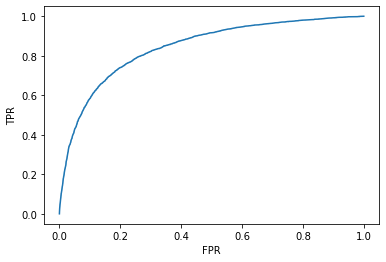

In [44]:
# Plot ROC Curve
sns.lineplot(x = cutoffTable['FPR'], y = cutoffTable['TPR'])

In [45]:
# Area under curve (AUC): Higher the better. Bounds are 0 to 1.
auc(cutoffTable['FPR'], cutoffTable['TPR'])

0.8437957338030588

#### Find New Cutoff Point

In [46]:
# Option 1: Calculate the distance of cutoff points from 0,1 (left top corner). Pick the cutoff point closest to 0,1.
cutoffTable['Distance'] = np.sqrt((1-cutoffTable['TPR'])**2 + (0-cutoffTable['FPR'])**2) # Minimum Euclidean Distance

# Option 2: Calculate difference between TPR and FPR. Pick the cutoff point which has the maximum difference. 
cutoffTable['Diff_TPR_FPR'] = cutoffTable['TPR'] - cutoffTable['FPR'] # Max Diff. Bet. TPR & FPR

cutoffTable.head()

,FPR,TPR,Cutoff,Distance,Diff_TPR_FPR
0,0.000000,0.000000,1.965515,1.000000,0.000000
1,0.000000,0.000272,0.965515,0.999728,0.000272
2,0.000000,0.001630,0.951758,0.998370,0.001630
3,0.000158,0.001630,0.945181,0.998370,0.001472
4,0.000158,0.013859,0.922771,0.986141,0.013701


In [47]:
# Option 1 cutoff point
cutoffPoint1 = cutoffTable.sort_values(["Distance"], ascending = False)["Cutoff"].values[-1:][0]
print(cutoffPoint1)

# Option 2 cutoff point
cutoffPoint2 = cutoffTable.sort_values(["Diff_TPR_FPR"], ascending = True)["Cutoff"].values[-1:][0]
print(cutoffPoint2)

# Lets take one of the cutoff points to test it on the testset. I'm going with cutoffPoint2

0.21737048516251206
0.23599725927557746


#### Test Model Using New Cutoff Point

In [48]:
# Get classification of 0 or 1 based on cutoffPoint2
testPredDf['Predicted_Class_2'] = np.where(testPredDf['Predicted_Prob'] >= cutoffPoint2, 1, 0)

# Confusion Matrix
confusionMatrix = pd.crosstab(testPredDf["Actual"], testPredDf['Predicted_Class_2']) # R, C format
confusionMatrix


Predicted_Class_2,0,1
Actual,,
0,3334,804
1,339,903


In [49]:
# Accuracy
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100 # ~79%

78.7546468401487

In [50]:
print("F1-Score: ", f1_score(testPredDf["Actual"], testPredDf['Predicted_Class_2'])) # Actual, Predicted
print("Precision: ", precision_score(testPredDf["Actual"], testPredDf['Predicted_Class_2'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf["Actual"], testPredDf['Predicted_Class_2'])) # Actual, Predicted

F1-Score:  0.612410986775178
Precision:  0.5289982425307557
Recall:  0.7270531400966184


In [51]:
print(classification_report(testPredDf["Actual"], testPredDf['Predicted_Class_2'])) # Actual, Predicted

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      4138
           1       0.53      0.73      0.61      1242

    accuracy                           0.79      5380
   macro avg       0.72      0.77      0.73      5380
weighted avg       0.82      0.79      0.80      5380



### MODEL BUILDING (Part 2: SGD Using Sklearn Library)

#### Model Building

In [52]:
# Model Building
sgdModel = SGDClassifier(loss = 'log', random_state = 11).fit(trainX, trainY) # Indep, Dep

In [58]:
# Coefficients
sgdModel.coef_

array([[ 1.8416584 , -0.17217014,  0.42148421, -0.27186757, -0.19747582,
         2.13355816, -0.55892214,  0.09434012,  0.31076238,  0.97012771,
         0.4015415 ,  0.75911903,  1.78008401,  0.27812555,  0.57607832,
         1.39800937,  1.35488562, -0.26583724, -0.14364823,  0.49219324,
         0.34777112,  0.21753555,  0.62503615,  0.83654795,  0.69065757,
         0.85160461, -0.42502928,  0.30970957,  0.56691226, -0.25255075,
         0.20378901,  0.26085329,  0.51219486,  0.35141705,  0.08218023,
        -0.25359995,  0.1769313 ]])

#### Model Prodiction

In [53]:
# Get probabilities
testPredDf['Predicted_Prob_SGD'] = sgdModel.predict(testX) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf['Predicted_Class_SGD'] = np.where(testPredDf['Predicted_Prob_SGD'] >= 0.5, 1, 0)

#### Confusion Matrix

In [54]:
# Confusion Matrix
confusionMatrix = pd.crosstab(testPredDf["Actual"], testPredDf['Predicted_Class_SGD']) # R, C format
confusionMatrix

Predicted_Class_SGD,0,1
Actual,,
0,3873,265
1,675,567


#### Accuracy

In [55]:
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100 # ~83%

82.5278810408922

#### Precision, Recall, F1-Score

In [56]:
print("F1-Score: ", f1_score(testPredDf["Actual"], testPredDf['Predicted_Class_SGD'])) # Actual, Predicted
print("Precision: ", precision_score(testPredDf["Actual"], testPredDf['Predicted_Class_SGD'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf["Actual"], testPredDf['Predicted_Class_SGD'])) # Actual, Predicted

F1-Score:  0.5467695274831244
Precision:  0.6814903846153846
Recall:  0.45652173913043476


In [57]:
print(classification_report(testPredDf["Actual"], testPredDf['Predicted_Class_SGD'])) # Actual, Predicted

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4138
           1       0.68      0.46      0.55      1242

    accuracy                           0.83      5380
   macro avg       0.77      0.70      0.72      5380
weighted avg       0.81      0.83      0.81      5380

